In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn.neighbors as sn
import skimage.transform as skt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from skimage.feature import hog



In [5]:
img_array = np.load('img_array.npy')
label_array = np.load('label_array.npy')

# Split Train and Test

In [6]:
from sklearn.model_selection import train_test_split

train, test, train_label, test_label = train_test_split(img_array, label_array, test_size=0.2, random_state=7)

# Extract Feature (Train)

In [7]:
feature_array = []


for img in train:

    #Sobel (Edge)
    filtY = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    filtX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    outX = cv2.filter2D(img,-1,filtX,borderType=0)/112
    outY = cv2.filter2D(img,-1,filtY,borderType=0)/112
    img = np.sqrt((outX**2)+(outY**2))

    #Radon
    tta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = skt.radon(img, theta=tta)


    feature_array.append(np.array(sinogram).reshape(-1,1))


feature_Tr = np.array(feature_array).reshape(len(feature_array),-1)


C:\Users\Tunwongchai\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


# Train

In [8]:
clf_knn = sn.KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf_knn.fit(feature_Tr, train_label)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [9]:
clf_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',)
clf_svm.fit(feature_Tr, train_label)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [10]:
clf_nab = GaussianNB()
clf_nab.fit(feature_Tr, train_label)

GaussianNB()

# Extract Feature (Test)

In [11]:
feature_array = []


for img in test:

    #Sobel (Edge)
    filtY = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    filtX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    outX = cv2.filter2D(img,-1,filtX,borderType=0)/112
    outY = cv2.filter2D(img,-1,filtY,borderType=0)/112
    img = np.sqrt((outX**2)+(outY**2))

    #Radon
    tta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = skt.radon(img, theta=tta)


    feature_array.append(np.array(sinogram).reshape(-1,1))


feature_Ts = np.array(feature_array).reshape(len(feature_array),-1)


C:\Users\Tunwongchai\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


# Predict and Result

In [12]:
pred_knn = clf_knn.predict(feature_Ts)
pred_svm = clf_svm.predict(feature_Ts)
pred_nab = clf_nab.predict(feature_Ts)

In [13]:
from sklearn.metrics import accuracy_score

score_knn = round(accuracy_score(test_label, pred_knn),2)
score_svm = round(accuracy_score(test_label, pred_svm),2)
score_nab = round(accuracy_score(test_label, pred_nab),2)

print("KNN Model Accuracy:", score_knn)
print("SVM Model Accuracy:", score_svm)
print("Naive Bayes Model Accuracy:", score_nab)

KNN Model Accuracy: 0.25
SVM Model Accuracy: 0.41
Naive Bayes Model Accuracy: 0.3


In [14]:
from sklearn.metrics import classification_report

report_svm = classification_report(test_label, pred_svm, target_names=clf_svm.classes_)
print(report_svm)

              precision    recall  f1-score   support

      Bishop       0.67      0.60      0.63        20
        King       0.25      0.27      0.26        15
      Knight       0.50      0.45      0.47        20
        Pawn       0.35      0.30      0.33        23
       Queen       0.22      0.27      0.24        15
        Rook       0.43      0.50      0.46        18

    accuracy                           0.41       111
   macro avg       0.40      0.40      0.40       111
weighted avg       0.42      0.41      0.41       111



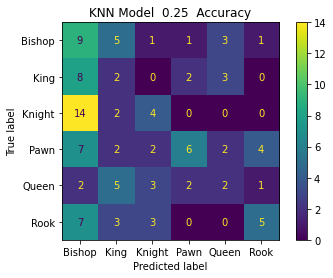

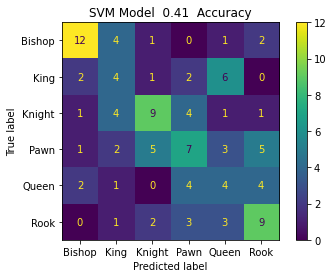

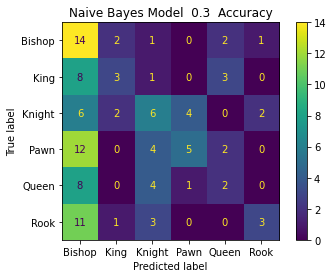

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(test_label, pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf_svm.classes_)

cm_knn = confusion_matrix(test_label, pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_knn.classes_)

cm_nab = confusion_matrix(test_label, pred_nab)
disp_nab = ConfusionMatrixDisplay(confusion_matrix=cm_nab, display_labels=clf_nab.classes_)

disp_knn.plot()
disp_knn.ax_.set_title('KNN Model  '+str(score_knn)+'  Accuracy')

disp_svm.plot()
disp_svm.ax_.set_title('SVM Model  '+str(score_svm)+'  Accuracy')

disp_nab.plot()
disp_nab.ax_.set_title('Naive Bayes Model  '+str(score_nab)+'  Accuracy')

plt.show()

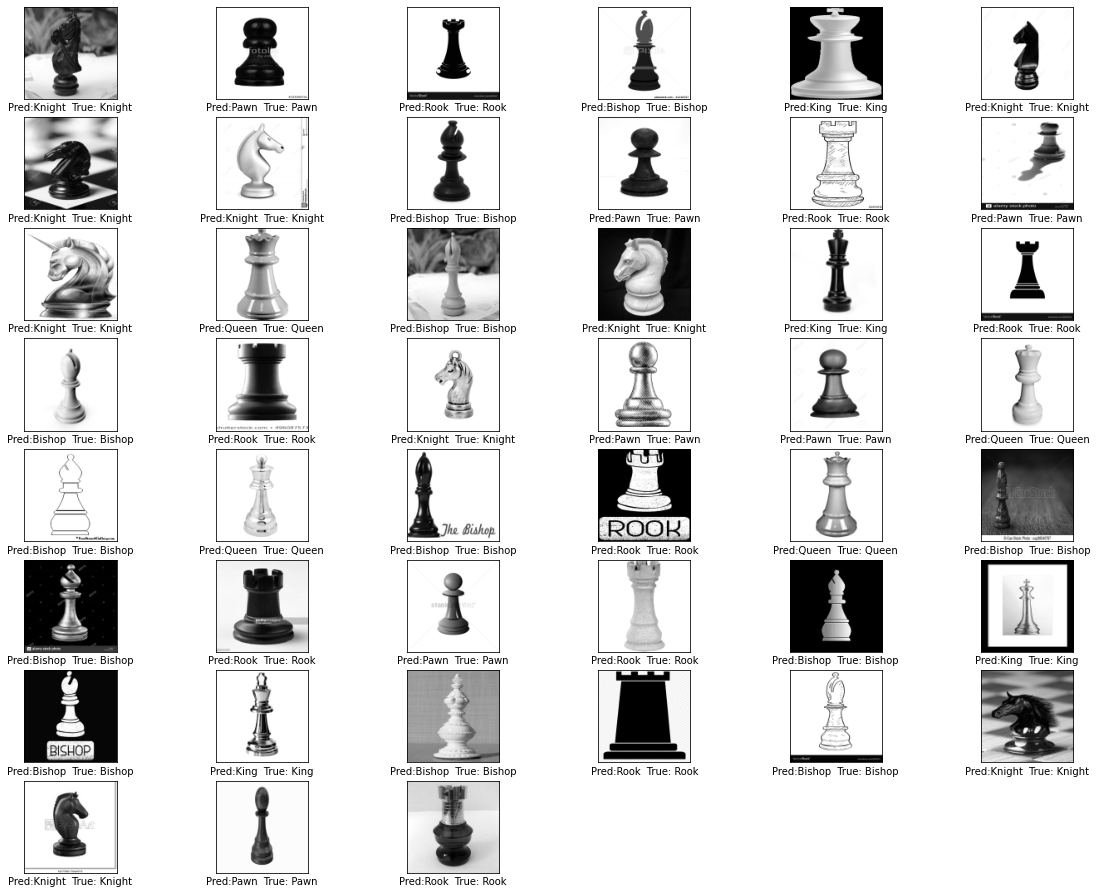

In [16]:
# plot true img
plt.figure(figsize=(20,20),facecolor='white')
i = 1
for idx, input, prediction, label in zip(enumerate(test), test, pred_svm, test_label):

    if prediction == label:
        # print("No.", idx[0], 'input,',input, ', has been classified as', prediction, 'and should be', label) 
        plt.subplot(10,6,i)
        plt.xticks([])
        plt.yticks([])
        
        plt.imshow(input, cmap='gray')
        plt.xlabel('Pred:'+ str(prediction)+ '  True: '+ str(label), )
        i += 1

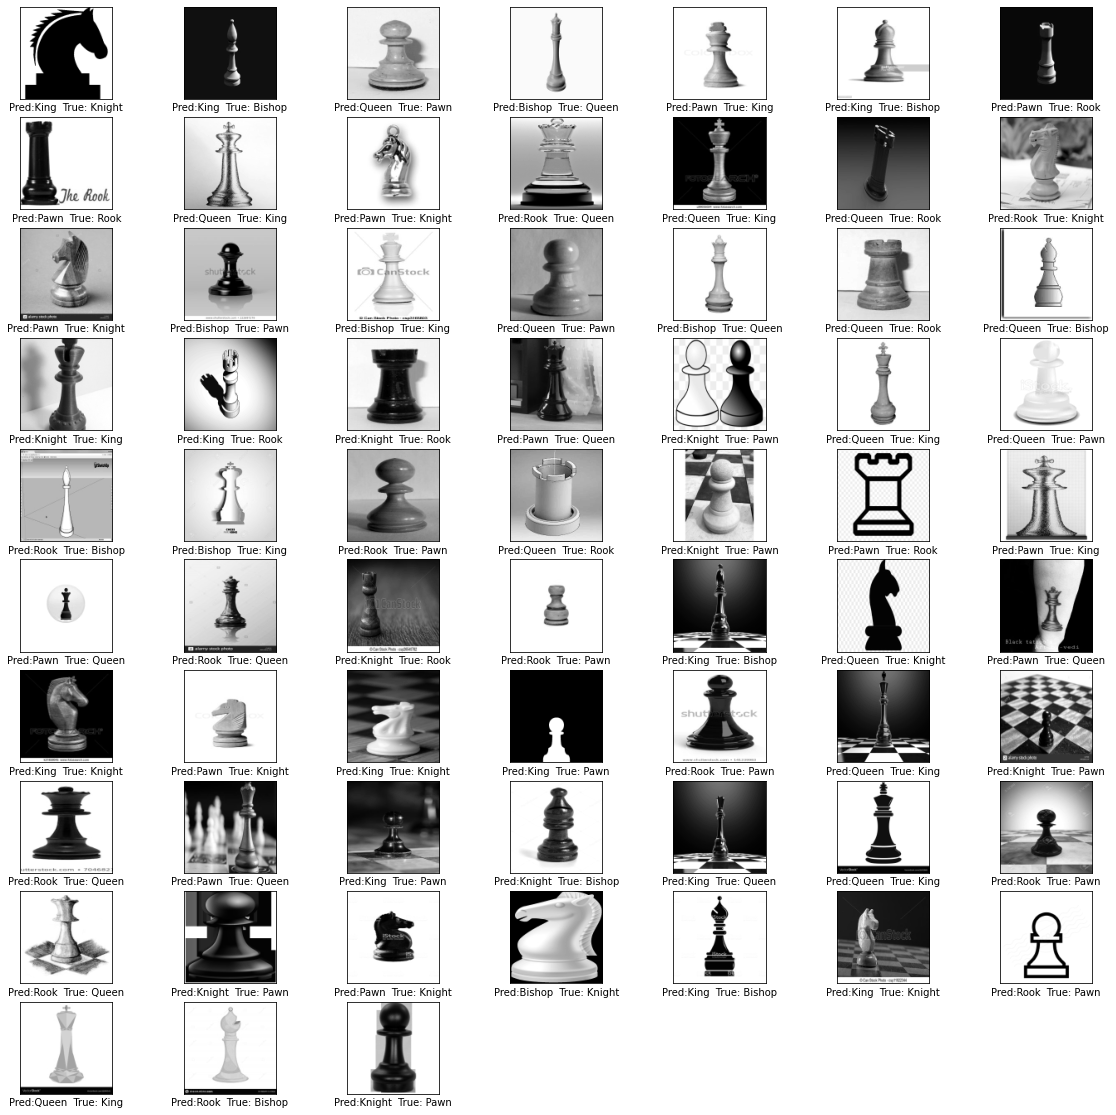

In [17]:
#plot wrong img
plt.figure(figsize=(20,20), facecolor='white')
i = 1
for idx, input, prediction, label in zip(enumerate(test), test, pred_svm, test_label):

    if prediction != label:
        # print("No.", idx[0], 'input,',input, ', has been classified as', prediction, 'and should be', label) 
        plt.subplot(10,7,i)
        plt.xticks([])
        plt.yticks([])

        plt.imshow(input, cmap='gray')
        plt.xlabel('Pred:'+ str(prediction)+ '  True: '+ str(label), )
        i += 1

# Test single image

In [24]:
feature_array = []
path = ''

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (112, 112), interpolation=cv2.INTER_AREA)


filtY = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
filtX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

outX = cv2.filter2D(img,-1,filtX,borderType=0)/112
outY = cv2.filter2D(img,-1,filtY,borderType=0)/112
img = np.sqrt((outX**2)+(outY**2))

#Radon
tta = np.linspace(0., 180., max(img.shape), endpoint=False)
sinogram = skt.radon(img, theta=tta)


feature_array.append(np.array(sinogram).reshape(-1,1))


feature_Ts = np.array(feature_array).reshape(len(feature_array),-1)

C:\Users\Tunwongchai\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


In [25]:
pred_svm = clf_svm.predict(feature_Ts)

In [26]:
pred_svm

array(['Knight'], dtype='<U6')